# Who is recruiting in Haiti and in what field. 
#### A study on jobs published on Jobpaw from 2008 to 2020

<br>
<br>

##### By Samson JULES
##### August 12th, 2020

# Business Problem
The supply and demand for employment is completely inadequate in Haiti. On the one hand, the skills in demand are not really known by the unemployed population, and even the people in the labour force do not mostly identify this issue. On the other hand, which may be upstream, studies are missing on this subject. This could guide or even adapt the reality of the training offer to the reality of the labour market. It is in this sense that we propose to analyze some job offers from 2008 to 2020 to see how to try to bring some elements that could serve as a solution.

For that, on more than 9000 data, since august 2008 to july 2020, we look at which are the main institutions that recruit in Haiti; in which fields or specialities; the evolution of the offer per year and per field....

## Target audience

Who will be mainly interested in this project:

1. Job seekers. This analysis will help them to understand the reality of the job offer, i.e. what areas are being recruited most and who is recruiting in this sector;
2. Investors who want to invest in one sector or another. With this work, they will be able to decide whether to invest in the sector where most or least recruitment is taking place;

3. Students or future students who are or will be preparing to face the job market.  They will be able to further refine their knowledge or training. They will thus be better prepared with a good background to face the job market.

4. Professionals wishing to change careers will have important information and analysis at their disposal to help them decide on their choice.

5. The public decision-makers who will have studies at their disposal for any adaptation of their employment policy to the reality of the market.

## Data acquisition and sources

Our main source for obtaining this data is <a href=https://www.jobpaw.com/pont> jobpaw.com</a>, a reference site for job postings. Our acquisition method is based on scraping the information on the website. Our database is built in French. In processing the information obtained, we proceeded as follows:
1. The initial columns are: Date de publication - Titre du poste - Domaine - Compagnie - Spécialité - Date limite - Ville - Durée;
2. We are deleting some non-essential columns;
3. Lines that do not contain a publication date have been removed.

In [1]:
#Import some librairies 
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
%%capture
! pip install seaborn

## Data Inspect and Cleaning

In [3]:
# Open the dataset
df = pd.read_excel('good_data.xlsx')
df

,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée
0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée
1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé
2,Unnamed: 1,Secrétaires de Direction,Secrétariat,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée
3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée
4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,27 Sept 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée
...,...,...,...,...,...,...,...,...,...,...,...
12045,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",1 Juil 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée
12046,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",2 Juil 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée
12047,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",2 Juil 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois
12048,1,Agent de liaison sécurité,Sécurité,2 Juil 2020,Haiti,Christ-Roi,Federation Handicap International,Sécurité,11 Juil 2020,Port-au-Prince,Déterminée


In [4]:
# reset the index and drop the nan value in 'Date publication' (publication date)
df.reset_index(inplace=True)
df.dropna(subset=["Date publication"],inplace=True)

In [5]:
# Convert the date format from french to american format
df['Date publication'] = df['Date publication'].apply(lambda x: x.split()[1] + ' ' + x.split()[0] + ' ' + x.split()[-1])
df['Annee'] = df['Date publication'].apply(lambda x: x.split()[-1])

In [6]:
months = {'Fév':'Feb','Avril':'Apr', 'Mai':'May', 'Juin':'Jun', 'Juil':'Jul', 'Aout':'Aug', 'Mars':'March'}
list(months.values())

['Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'March']

In [7]:
for keys, values in zip(list(months.keys()), list(months.values())):
    df['Date publication'] = df['Date publication'].str.replace(keys, values)

In [8]:
df.index = pd.to_datetime(df['Date publication'])

In [9]:
df.index

DatetimeIndex(['2008-09-27', '2008-09-27', '2008-09-27', '2008-09-27',
               '2008-09-27', '2008-10-03', '2008-10-01', '2008-09-10',
               '2008-10-10', '2008-10-10',
               ...
               '2020-06-22', '2020-06-22', '2020-06-26', '2020-06-26',
               '2020-07-01', '2020-07-01', '2020-07-02', '2020-07-02',
               '2020-07-02', '2020-07-02'],
              dtype='datetime64[ns]', name='Date publication', length=10795, freq=None)

In [10]:
df.shape

(10795, 13)

In [11]:
df

,index,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,,
2008-09-27,0,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,1,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,2,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,3,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,4,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12045,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,12046,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,12047,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [12]:
df['Date publication'].isna().sum()

0

In [13]:
df.drop(columns='index')

,Unnamed: 0,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,
2008-09-27,Unnamed: 1,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,Unnamed: 1,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,Unnamed: 1,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,1,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,1,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,1,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [14]:
df.drop(columns='Unnamed: 0')

,index,Titre du poste,Domaine,Date publication,Pays,Zone,Compagnie,Spécialité,Date limite,Ville,Durée,Annee
Date publication,,,,,,,,,,,,
2008-09-27,0,Un Responsable de commandes de Pièces d'automo...,Mécanique,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Mécanique automobile,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,1,Un Gérant de restaurant,"Tourisme, Hôtellerie et Restauration",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Restauration,30 Sept 2008,NaN,Indeterminé,2008
2008-09-27,2,Secrétaires de Direction,Secrétariat,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Secrétariat,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,3,Comptables Senior,"Management/Gestion, Finance, Comptabilité et C...",Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Comptabilité,30 Sept 2008,NaN,Indeterminée,2008
2008-09-27,4,Un Officier de crédit,Sciences économiques et politiques,Sept 27 2008,Haiti,NaN,Centre de Formation et d'Encadrement Technique...,Economie,30 Sept 2008,NaN,Indeterminée,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12045,Comptable Senior,"Management/Gestion, Finance, Comptabilité et C...",Jul 1 2020,Haiti,"4, Juvénat 5 Pétion-Ville, Haïti",Global Communities - (formerly CHF),Comptabilité,7 Juil 2020,Petion-Ville,Indéterminée,2020
2020-07-02,12046,Coordonateur (trice) du Programme d’Urgence da...,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,Cayes,Save the Children en Haiti,Gestion de Projets,15 Juil 2020,Camp-Perrin,Déterminée,2020
2020-07-02,12047,Grants Management Coordinator-Maternity Cover,"Management/Gestion, Finance, Comptabilité et C...",Jul 2 2020,Haiti,NaN,Plan International-Haiti,Management/Gestion,8 Juil 2020,NaN,3 mois,2020


In [15]:
df.isnull().sum()

index                  0
Unnamed: 0             0
Titre du poste         0
Domaine                0
Date publication       0
Pays                   0
Zone                1697
Compagnie              0
Spécialité           391
Date limite            0
Ville               5216
Durée                 19
Annee                  0
dtype: int64

In [16]:
# replace nan value by 'Non définie' (undefined)
df['Zone'] = df.Zone.fillna('Non définie')
df['Spécialité'] = df.Spécialité.fillna('Non définie')
df['Ville'] = df.Ville.fillna('Non définie')

In [17]:
# drop some columns
df = df.drop(columns=['index','Unnamed: 0'])

In [18]:
# replace some rows value in Company columns
df.loc[df['Compagnie'] == 'ong', 'Compagnie'] = "Autres ONG's"
df.loc[df['Compagnie'] == 'prive', 'Compagnie'] = "Secteur privé"

# Domain cleaning
df.loc[df['Domaine'] == '- - Non-defini - -', 'Domaine'] = 'Non défini'


In [19]:
# drop duplicate values
df= df.drop_duplicates(subset=None, keep='first', inplace=False)


###### In this section, we will categorize the duration of the contracts into fixed-term [12 months and over], fixed-term (short-term) [less than 12 months] and open-ended contracts. Due to the data structure, we will only process about 9000 data, as it would take a long time for the total processing.

In [20]:
# We fix the rows values and replace them

df.loc[df['Durée'] == '6 mois (Renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'six (6) mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'douze (12) mois renouvelables après évaluation des performances', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'douze (12) mois renouvelable après évaluation.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'This will be a full-time assignment working on the PPSELD calendar as defined by PPSELD management', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée (1 an renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Full-Time', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (renewable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long-term consulting assignment', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '126 jours (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '57 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'huit (8) mois renouvelables pour une année au regard des performances du Contractuel et de la disponibilité de financement du projet', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'à définir', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Contrat de 2 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Trois (3) années', 'Durée'] = 'Déterminée'

df.loc[df['Durée'] == '1 an (avec possibilité de renouvellement), période de probation de trois mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois Renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Déterminée: 10 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'non défini', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Décembre 2017', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 3 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Contrat de 6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '13 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois, renouvelable 12 mois sous condition de performance satisfaisante', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 mois renouvelables pendant toute la durée du projet (3 ans) au gré des parties', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Undetermined', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '6 mois(renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois avec possibilité de prolongation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 à 6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '30 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 Months', 'Durée'] = 'Déterminée (court terme)'



df.loc[df['Durée'] == '1 month & renewable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'sept (7) mois allant de mars à septembre 2020', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '5 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'CDD (4 ans)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Three-month probation with possibility of extension after satisfactory evaluation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '31 Août 2010', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contract based', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '12 mois renouvelables incluant les 3 mois de probation', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '60 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Contrat à durée déterminée de 6 mois renouvelables', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Permanente', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'douze (12) mois renouvelables après une période de probation de trois (3) mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Through the duration of the Project', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '9,5 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'indeterminee', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension", 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == 'Jusqu’au 30 Septembre 2016 puis 1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indéterminé après période probatoire de trois (3) mois', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 year, renewable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminado', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an (renouvlable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 année (renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'indéterminée', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an, renouvelable sur 3 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois (avec possibilité de renouvellement)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Durée déterminée (1 an renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '10 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois renouvable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois, renouvelables selon financement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == '3 Semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '7 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 mois (renouvlable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months (with possibility of extension)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 an renouvlable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Determinee (4 ans)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat de 7 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Three-month probation contract with possibility of one-year extension after satisfactory evaluation', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension', 'Durée"] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '45 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Fixed term contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée /1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'un an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent position', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '3 ans et demi', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDD renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (renouvelable après évaluation)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'We are looking for along term commitment preferably two years (negotiable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'One year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long-term', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'OPEN ENDED CONTRACT', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Open ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Ce poste est base sur la durée de vie du projet', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '120 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilite de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months renewable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '4 mois avec possibilité d’extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "3 mois avec possibilité d'extension', 'Durée"] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Trois mois de probation avec possibilité de renouvellement après évaluation satisfaisante', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '10 months', 'Durée'] = 'Déterminée (court terme)'


df.loc[df['Durée'] == '1an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 months, with a 3-month probationary period and potential for renewal', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == ': Déterminé jusqu’à la fin de l’année de 2021 (avec possibilité d’extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "12 mois avec une possibilite d'extension", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminee', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == "Trois mois de probation avec possibilité d'extension d'une année", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 semaines', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (renouvelable après évaluation)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '4 Months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (avec possibilité d’extension)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 month with possibility of extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '10 jours', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indéterminée, période probatoire de 3 mois', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '1 an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'un (1) an renouvelable sur base de performance', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 An Renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an, renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: Deux (2) ans – Juillet 2017 jusqu’à Juin 2019', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois (avec possibilité de prolongation)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an (avec possibilité de renouvellement)', 'Durée'] = 'Déterminée'



df.loc[df['Durée'] == 'One year with potential to extend', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'deux (2) ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinée (12 mois)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 1 an avec possibilité de renouvellement.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '5 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat de 12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée: 12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'contrat de 14 mois (sous réserve d’obtention des fonds).', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Temps plein, exclusivité d’emploi', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Indéterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Open-Ended', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilité d’extension.', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Three-month probation with possibility of one-year extension', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 MOIS', 'Durée'] = 'Déterminée (court terme)'



df.loc[df['Durée'] == '4 années', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Annee (Renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Three-month probation contract with possibility of extension after satisfactory evaluation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois avec possibilité de prolongation', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'non defini', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Contrat de 6 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (Possibilité de renouvellement)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois (possibilité de renouvellement selon besoin)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'contrat de 14 mois (sous réserve d’obtention des fonds)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDI', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Full-time local position', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Long Term', 'Durée'] = 'Indéterminée'


df.loc[df['Durée'] == '1 year, extendable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year renewable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1.5 month', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 semaines', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '9 MOIS', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Trois mois de probation avec possibilite de renouvellement apres evaluation satisfaisante', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois, renouvelable', 'Durée'] = 'Déterminée'


df.loc[df['Durée'] == 'trois ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '17 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'October 1,2013 to March 31, 2016', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 AN', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Year with possibility for extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 An', 'Durée'] = 'Déterminée'


df.loc[df['Durée'] == 'un an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '15 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois avec possibilite de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 month contract', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat à durée déterminée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an Renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 Mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '4 ans', 'Durée'] = 'Déterminée'



df.loc[df['Durée'] == '5 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Déterminee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an (Renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Contrat', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '24 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 years', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 years', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '11 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "6 mois (renouvelable sur une base d'évaluation)", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '15 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 months', 'Durée'] = 'Déterminée (court terme)'

df.loc[df['Durée'] == '12 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == "12 mois avec possibilité d'extension", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'déterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'A déterminer', 'Durée'] = 'Non définie'
df.loc[df['Durée'] == 'Non defini', 'Durée'] = 'Non définie'




df.loc[df['Durée'] == 'Determine', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Temporaire', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Open Ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '12 mois, renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'open-ended', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '3 mois (renouvelable)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Un (1) an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '2 ans renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois sur une base renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 mois renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Through March 31, 2016', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 months', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 months with possibility of extension', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'The assignment is estimated as a life of project position.', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 mois renouvelables', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois renouvelables', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) An', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Permanent Position with at first a one year contract', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '3 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Long term contract', 'Durée'] = 'Déterminée'




df.loc[df['Durée'] == 'déterminée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Indeterminée', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == 'Determinee', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year (renewable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminée (1 an)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat CDD, 12 mois avec 3 mois  comme periode probatoire', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Contrat CDD, 12 mois avec 3 mois mois comme periode probatoire', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '12 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '7 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '12 jours', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Until January 31, 2021, possible to be extended.', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois (conditionnel à l’obtention du financement)', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 an (renouvelable)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Indeterminé', 'Durée'] = 'Indéterminée'
df.loc[df['Durée'] == '1 an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Determiné', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determinée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'determiné', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Déterminé', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'CDD', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Poste permanent (contrat d’un an, qui sera renouvelé sous forme de contrat à durée indéterminée en fonction des performances du candidat)', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '3 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '9 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '18 mois', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '4 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 mois renouvelable', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Determinée', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 an', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '10 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 months', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '2 ans', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '8 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '5 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == 'Un an renouvelable', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 Year', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == 'Un (1) an avec possibilité de renouvellement', 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '1 mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '6 Mois', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "Trois mois de probation avec possibilité d'extension après évaluation satisfaisante", 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == "12 mois renouvelable sur la base d'évaluation", 'Durée'] = 'Déterminée'
df.loc[df['Durée'] == '6 mois avec possibilité de renouvellement', 'Durée'] = 'Déterminée (court terme)'
df.loc[df['Durée'] == '1 année renouvelable', 'Durée'] = 'Déterminée'





In [21]:
# We select here only the cells with the duration of the contracts as predefined: Indeterminee, Determinee, Determinee (court terme) et Non definie.
df_a = df[df.Durée=='Déterminée']
df_b = df[df.Durée=='Déterminée (court terme)']
df_c = df[df.Durée=='Indéterminée']
df_d = df[df.Durée=='Non définie']

df_first = pd.concat([df_a, df_b, df_c, df_d])



In [22]:
# Then drop other columns
df_first = df_first.drop(columns= ['Pays', 'Zone','Date limite'])


## EDA

In [23]:
# Companies who hiring
df_first.Compagnie.unique().shape

(688,)

 ###### We have 688 company names in our new dataset

### Top 10 Companies or institutions

In [24]:
# Top companies

companies = df_first.Compagnie.value_counts().to_frame()
top_recruit_companies = companies[:10]
top_recruit_companies

,Compagnie
Catholic Relief Services,567
Plan International-Haiti,282
Autres ONG's,255
CARE Haiti,250
Save the Children en Haiti,249
Secteur privé,248
Concern Worldwide Haiti,232
Organisation Haïtienne de Maketing Social pour la Santé (PSI-Haïti),183
Croix Rouge Americaine,174
GOAL Haiti,170


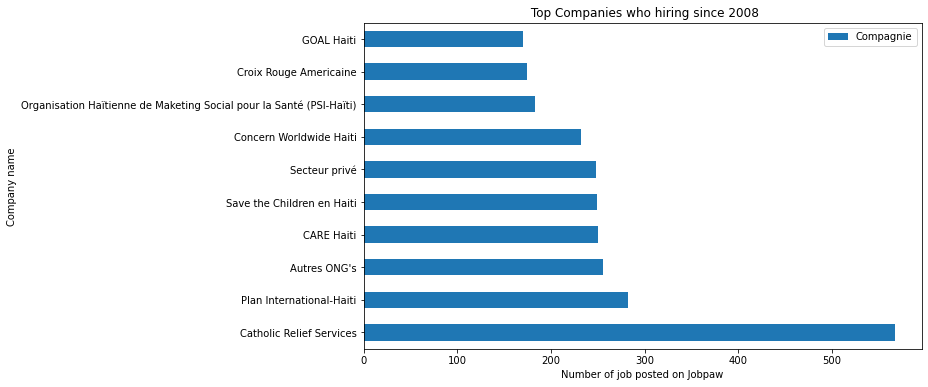

In [25]:
# Plot 
top_recruit_companies.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of job posted on Jobpaw') # add to x-label to the plot
plt.ylabel('Company name') # add y-label to the plot
plt.title(' Top Companies who hiring since 2008') # add title to the plot
9491
plt.show()

In [26]:
# The post titles in demand
df_first['Titre du poste'].value_counts().to_frame()

,Titre du poste
Comptable,84
Chauffeur,64
Assistante Administrative,39
Administrative Assistant,38
Finance Manager,25
...,...
Administator,1
Assistant de projet d’Education,1
Chief of Party (Haiti),1
Officier Achats,1


In [27]:
# Top Specialitiess
specialities = df_first['Spécialité'].value_counts().to_frame()
top_specialities = specialities[:10]
top_specialities

,Spécialité
Management/Gestion,1231
Comptabilité,556
Agronomie,367
Sciences Sociales,362
Gestion de Projets,362
Santé Publique,339
Non définie,328
Communication,273
Génie Civil,263
Finance et Banque,231


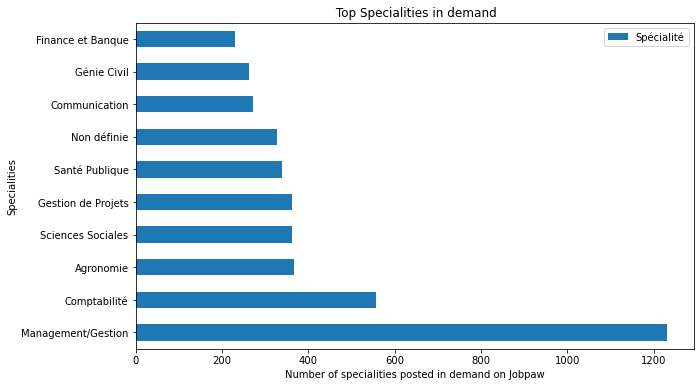

In [28]:
# Plot top Specialities
top_specialities.plot(kind='barh', figsize=(10, 6))

plt.ylabel('Specialities') # add to x-label to the plot
plt.xlabel('Number of specialities posted in demand on Jobpaw') # add y-label to the plot
plt.title(' Top Specialities in demand') # add title to the plot

plt.show()

In [29]:
# Domain
df_first.Domaine.value_counts().to_frame()

,Domaine
"Management/Gestion, Finance, Comptabilité et Commerce",3206
Santé et Professions médicales,1087
Sciences Humaines et Sociales,1014
Agriculture – Agroalimentaire,622
Sciences de l’Ingénieur,510
Sciences Informatiques,362
Sciences économiques et politiques,346
Transport et Logistique,327
Sciences de l’Education,323
Secrétariat,321


In [30]:
# Top Domain in percent
domain = df_first.Domaine.value_counts(normalize=True, ascending=True).to_frame()
top_domain = domain[13:30]
top_domain

,Domaine
Métiers du bâtiment et autres,0.013170
Environnement et Sciences de la Terre,0.014119
Marketing,0.016437
Non défini,0.019808
Communication et Journalisme,0.031082
Secrétariat,0.033822
Sciences de l’Education,0.034032
Transport et Logistique,0.034454
Sciences économiques et politiques,0.036456
Sciences Informatiques,0.038141


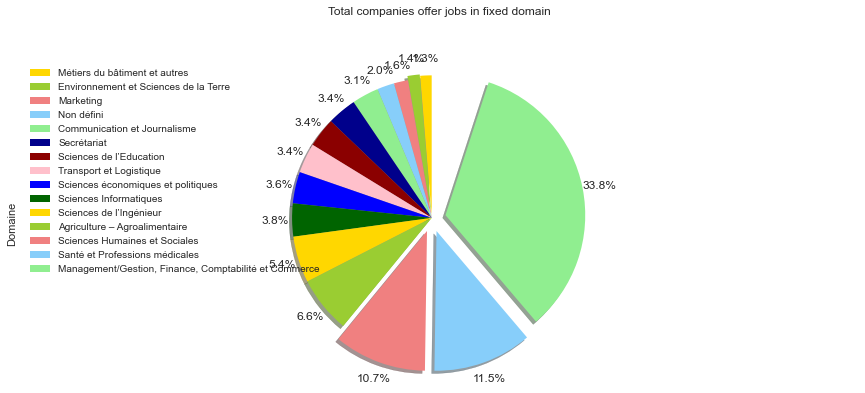

In [90]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen','darkblue', 'darkred' ,'pink','blue','darkgreen']
explode_list = [0.02,0.03,0,0,0, 0,0, 0,0,0,0,0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

top_domain['Domaine'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Total Domains', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=top_domain.index, loc='upper left') 

plt.show()

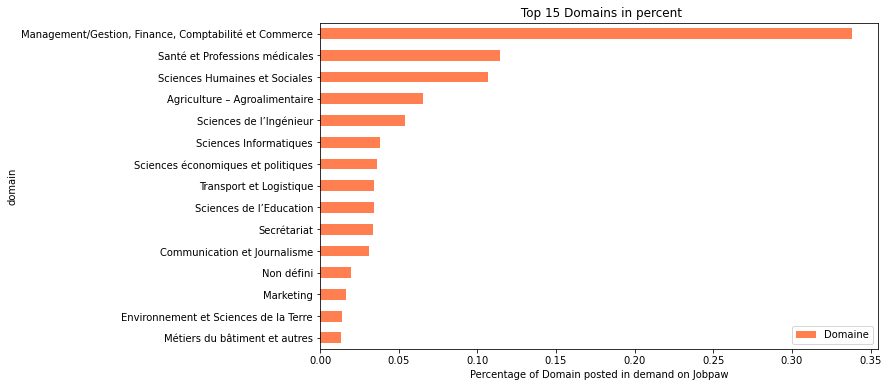

In [31]:
# Plot top Domain in percent
top_domain.plot(kind='barh', figsize=(10, 6), color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.ylabel('domain') # add to x-label to the plot
plt.xlabel('Percentage of Domain posted in demand on Jobpaw') # add y-label to the plot
plt.title(' Top 15 Domains in percent') # add title to the plot

plt.show()

In [32]:
df_first.Durée.value_counts().to_frame()

,Durée
Indéterminée,5402
Déterminée,3006
Déterminée (court terme),1052
Non définie,31


In [33]:
# Contract status
df_first.Durée.value_counts(normalize=True).to_frame()

,Durée
Indéterminée,0.569171
Déterminée,0.316721
Déterminée (court terme),0.110842
Non définie,0.003266


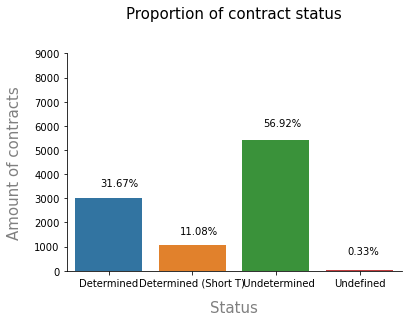

In [34]:
# Plot Contract status
amount_undetermined = df_first.Durée.value_counts()[0] / df_first.shape[0] * 100
amount_determined = df_first.Durée.value_counts()[1] / df_first.shape[0] * 100
amount_determined_short = df_first.Durée.value_counts()[2] / df_first.shape[0] * 100
amount_undefined = df_first.Durée.value_counts()[3] / df_first.shape[0] * 100

sns.countplot(x='Durée', data=df_first)
plt.xticks([0, 1,2,3], ['Determined', 'Determined (Short T)','  Undetermined', 'Undefined'])
plt.xlabel('Status', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of contracts', size=15, labelpad=12, color='grey')
plt.title("Proportion of contract status", size=15, pad=35)
plt.ylim(0, 9000)
plt.text(-0.10, 3500, f"{round(amount_determined, 2)}%", fontsize=10)
plt.text(0.85, 1500, f"{round(amount_determined_short, 2)}%", fontsize=10)
plt.text(1.85, 6000, f"{round(amount_undetermined, 2)}%", fontsize=10)
plt.text(2.85, 700, f"{round(amount_undefined, 2)}%", fontsize=10)

sns.despine()

In [35]:
df1 = df_first.groupby(['Compagnie','Domaine']).count().sort_values(by='Domaine', ascending=False)
df1.tail(10)

,,Titre du poste,Date publication,Spécialité,Ville,Durée,Annee
Compagnie,Domaine,,,,,,
Centro Internacional de Agricultura Tropical,Agriculture – Agroalimentaire,1,1,1,1,1,1
Uniterra,Agriculture – Agroalimentaire,1,1,1,1,1,1
Organisation Haïtienne de Maketing Social pour la Santé (PSI-Haïti),Agriculture – Agroalimentaire,1,1,1,1,1,1
Chemonics / IFMS,Agriculture – Agroalimentaire,6,6,6,6,6,6
Norwegian Church Aid / Aide de l'Eglise Norvegienne,Agriculture – Agroalimentaire,1,1,1,1,1,1
NCBA CLUSA,Agriculture – Agroalimentaire,8,8,8,8,8,8
Chemonics International / Projet de reboisement USAID,Agriculture – Agroalimentaire,22,22,22,22,22,22
Agronomes et Veterinaires sans Frontières,Agriculture – Agroalimentaire,6,6,6,6,6,6
Mouvman Peyizan Nò,Agriculture – Agroalimentaire,1,1,1,1,1,1


In [36]:
# Total jobs based on domain per year
years1 = df_first.groupby('Annee')['Domaine'].count().to_frame().sort_values(by='Annee')
years = years1[:12]
years

,Domaine
Annee,
2008,202
2009,492
2010,962
2011,833
2012,753
2013,723
2014,883
2015,858
2016,1000


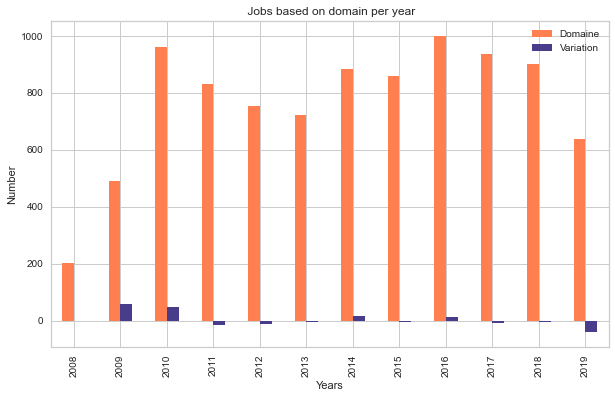

In [100]:
years.plot(kind='bar', figsize=(10, 6), color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.ylabel('Number') # add to y-label to the plot
plt.xlabel('Years') # add x-label to the plot
plt.title(' Jobs based on domain per year') # add title to the plot

plt.show()

In [38]:
var = ['1','2','3','4','5','6','7','8','9','10','11','12']

years['Variation'] = pd.DataFrame(var)
years

<ipython-input-38-0a9056302d25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['Variation'] = pd.DataFrame(var)


,Domaine,Variation
Annee,,
2008,202,NaN
2009,492,NaN
2010,962,NaN
2011,833,NaN
2012,753,NaN
2013,723,NaN
2014,883,NaN
2015,858,NaN
2016,1000,NaN


In [39]:
years['Variation'][0] =  0 
years['Variation'][1] = (f"{round(((years['Domaine'][1] - years['Domaine'][0])/years['Domaine'][1]*100), 2)}")
years['Variation'][2] = (f"{round(((years['Domaine'][2] - years['Domaine'][1])/years['Domaine'][2]*100), 2)}")
years['Variation'][3] = (f"{round(((years['Domaine'][3] - years['Domaine'][2])/years['Domaine'][3]*100), 2)}")
years['Variation'][4] = (f"{round(((years['Domaine'][4] - years['Domaine'][3])/years['Domaine'][4]*100), 2)}")
years['Variation'][5] = (f"{round(((years['Domaine'][5] - years['Domaine'][4])/years['Domaine'][5]*100), 2)}")
years['Variation'][6] = (f"{round(((years['Domaine'][6] - years['Domaine'][5])/years['Domaine'][6]*100), 2)}")
years['Variation'][7] = (f"{round(((years['Domaine'][7] - years['Domaine'][6])/years['Domaine'][7]*100), 2)}")
years['Variation'][8] = (f"{round(((years['Domaine'][8] - years['Domaine'][7])/years['Domaine'][8]*100), 2)}")
years['Variation'][9] = (f"{round(((years['Domaine'][9] - years['Domaine'][8])/years['Domaine'][9]*100), 2)}")
years['Variation'][10] = (f"{round(((years['Domaine'][10] - years['Domaine'][9])/years['Domaine'][10]*100), 2)}")
years['Variation'][11] = (f"{round(((years['Domaine'][11] - years['Domaine'][10])/years['Domaine'][11]*100), 2)}")
#years['Variation'][12] = (f"{round(((years['Domaine'][12] - years['Domaine'][11])/years['Domaine'][12]*100), 2)}%")



years


<ipython-input-39-503bfaf5a5d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['Variation'][0] =  0
C:\Users\DG IDERICE\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-39-503bfaf5a5d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['Variation'][1] = (f"{round(((years['Domaine'][1] - years['Do

,Domaine,Variation
Annee,,
2008,202,0
2009,492,58.94
2010,962,48.86
2011,833,-15.49
2012,753,-10.62
2013,723,-4.15
2014,883,18.12
2015,858,-2.91
2016,1000,14.2


In [40]:
years['Variation']= years['Variation'].astype('str')
#churn_mod['gender'] = churn_mod['gender'].astype('category').cat.codes

<ipython-input-40-573cc1ebc8df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['Variation']= years['Variation'].astype('str')


In [41]:
years['Variation'] = pd.to_numeric(years['Variation'])

<ipython-input-41-255ec40c72f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['Variation'] = pd.to_numeric(years['Variation'])


C:\Users\DG IDERICE\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


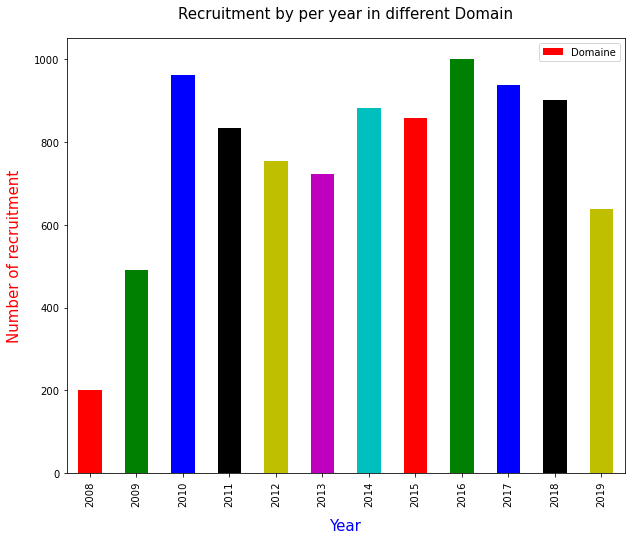

In [42]:
years[['Domaine']].plot(kind='bar', figsize=(10, 8), color = 'rgbkymc')
plt.xlabel('Year', size=15, labelpad=12, color='blue')
plt.ylabel('Number of recruitment', size=15, labelpad=12, color='red')
plt.title("Recruitment by per year in different Domain", size=15, pad=20)
#my_colors = 'rgbkymc'  #red, green, blue, black, etc.

#pd.Series.plot(
#    s, 
#    kind='bar', 
#    color=my_colors,
#)
plt.show()

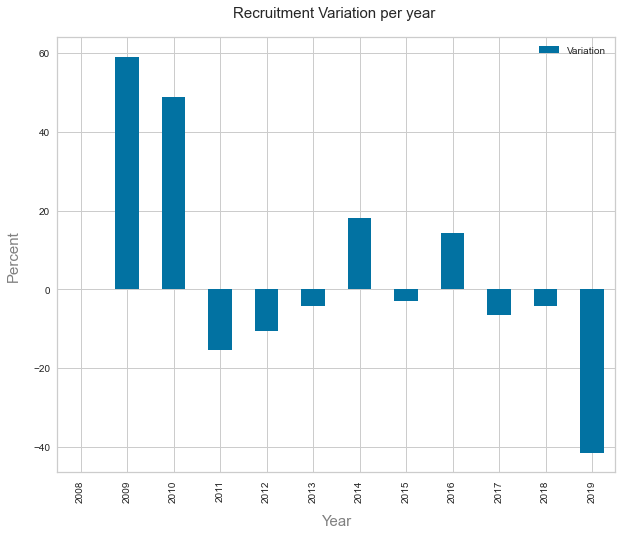

In [101]:
years[['Variation']].plot(kind='bar', figsize=(10, 8))
plt.xlabel('Year', size=15, labelpad=12, color='grey')
plt.ylabel('Percent', size=15, labelpad=12, color='grey')
plt.title("Recruitment Variation per year ", size=15, pad=20)
plt.show()



##### Impact of the 2010 earthquake on employment opportunities

In this section we want to look at the impact of the jan 12th, 2010 earthquake on employment opportunities in Haiti. One year before and 6 months immediately after.

In [44]:
# One year before (jan 12th, 2009 - jan 12th, 2010)
job_before = df_first.loc['2009-01-12':'2010-01-12']
job_before

,Titre du poste,Domaine,Date publication,Compagnie,Spécialité,Ville,Durée,Annee
Date publication,,,,,,,,
2009-01-27,Un(e) Comptable,"Management/Gestion, Finance, Comptabilité et C...",Jan 27 2009,MARNDR/Projet de Renforcement des Services Pub...,Comptabilité,Non définie,Déterminée,2009
2009-02-02,Formation de formateurs,"Management/Gestion, Finance, Comptabilité et C...",Feb 2 2009,Projet d'appui technique en Haïti,Management/Gestion,Non définie,Déterminée,2009
2009-02-01,Un assistant administratif et financier,"Management/Gestion, Finance, Comptabilité et C...",Feb 1 2009,Fonds des Nations Unies pour la Population,Management/Gestion,Non définie,Déterminée,2009
2009-02-10,Expert en Egalité entre les Femmes et les Homm...,Sciences Humaines et Sociales,Feb 10 2009,Centre de Coopération Haïti-Canada,Non définie,Non définie,Déterminée,2009
2009-02-11,M & E Project Officer,Sciences Informatiques,Feb 11 2009,Autres ONG's,Base de données,Non définie,Déterminée,2009
...,...,...,...,...,...,...,...,...
2009-12-12,Responsable de Rédaction,Secrétariat,Dec 12 2009,Groupe EFFICIENCE,Assistante Administrative,Non définie,Indéterminée,2009
2009-12-15,Sage-Femme Chargee de Programme Soins Obstetri...,Santé et Professions médicales,Dec 15 2009,Aide Médicale Internationale - France,Médecine communautaire,Non définie,Indéterminée,2009
2009-12-17,Contrôleur Interne,"Management/Gestion, Finance, Comptabilité et C...",Dec 17 2009,Fonds d'Assistance Economique et Sociale,Management/Gestion,Non définie,Indéterminée,2009


In [45]:
# One year before top domains
job_before_table = job_before.Domaine.value_counts().to_frame()
job_before_tab = job_before_table[:14]
job_before_tab.rename(columns={'Domaine':'Jan 09 - Jan 10'}, inplace=True)
job_before_tab

C:\Users\DG IDERICE\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Jan 09 - Jan 10
"Management/Gestion, Finance, Comptabilité et Commerce",182
Santé et Professions médicales,56
Secrétariat,41
Sciences de l’Ingénieur,37
Sciences Humaines et Sociales,30
Sciences Informatiques,21
Agriculture – Agroalimentaire,21
Transport et Logistique,18
Sciences de l’Education,17
Communication et Journalisme,15


In [74]:
# 6 months after
job_afterMonths = df_first.loc['2010-01-13':'2010-6-12']
job_afterMonths

,Titre du poste,Domaine,Date publication,Compagnie,Spécialité,Ville,Durée,Annee
Date publication,,,,,,,,
2010-01-18,Ingénieur(s) Eau & Habitat,Sciences de l’Ingénieur,Jan 18 2010,Comité International de la Croix Rouge,Non définie,Non définie,Déterminée,2010
2010-02-01,Gestionnaire de stock,Transport et Logistique,Feb 1 2010,Handicap International - France,Logistique,Non définie,Déterminée,2010
2010-02-03,Magasinier,Transport et Logistique,Feb 3 2010,Comité International de la Croix Rouge,Logistique,Non définie,Déterminée,2010
2010-03-06,specialiste cash for work,"Management/Gestion, Finance, Comptabilité et C...",March 6 2010,Oxfam Quebec,Management/Gestion,Non définie,Déterminée,2010
2010-03-06,Promoteur (trice) en sante publique,Santé et Professions médicales,March 6 2010,Oxfam Quebec,Santé Publique,Non définie,Déterminée,2010
...,...,...,...,...,...,...,...,...
2010-06-09,Hygiene Promotion Officer/Conseiller Technique...,Santé et Professions médicales,Jun 9 2010,Islamic Relief Haiti,Non définie,Non définie,Indéterminée,2010
2010-06-07,Officier de Documentation - Finance,Non défini,Jun 7 2010,Islamic Relief Haiti,Non définie,Non définie,Indéterminée,2010
2010-06-07,"Assistant ou Assistante, Logistique sur le Ter...","Management/Gestion, Finance, Comptabilité et C...",Jun 7 2010,Islamic Relief Haiti,Non définie,Non définie,Indéterminée,2010


In [75]:
# One year after
job_afterMonths = job_afterMonths.Domaine.value_counts().to_frame()
job_afterM = job_afterMonths[:14]
job_afterM.rename(columns={'Domaine':'Jan 13 - Jun 12, 10'}, inplace = True)
job_afterM

C:\Users\DG IDERICE\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,"Jan 13 - Jun 12, 10"
"Management/Gestion, Finance, Comptabilité et Commerce",130
Santé et Professions médicales,43
Sciences Humaines et Sociales,35
Sciences de l’Ingénieur,24
Transport et Logistique,22
Communication et Journalisme,17
Sciences Informatiques,14
Secrétariat,14
Agriculture – Agroalimentaire,14
Métiers du bâtiment et autres,13


In [52]:
# For One year after
job_afterYear = df_first.loc['2010-01-12':'2011-01-12']
job_afterYear

,Titre du poste,Domaine,Date publication,Compagnie,Spécialité,Ville,Durée,Annee
Date publication,,,,,,,,
2010-01-18,Ingénieur(s) Eau & Habitat,Sciences de l’Ingénieur,Jan 18 2010,Comité International de la Croix Rouge,Non définie,Non définie,Déterminée,2010
2010-02-01,Gestionnaire de stock,Transport et Logistique,Feb 1 2010,Handicap International - France,Logistique,Non définie,Déterminée,2010
2010-02-03,Magasinier,Transport et Logistique,Feb 3 2010,Comité International de la Croix Rouge,Logistique,Non définie,Déterminée,2010
2010-03-06,specialiste cash for work,"Management/Gestion, Finance, Comptabilité et C...",March 6 2010,Oxfam Quebec,Management/Gestion,Non définie,Déterminée,2010
2010-03-06,Promoteur (trice) en sante publique,Santé et Professions médicales,March 6 2010,Oxfam Quebec,Santé Publique,Non définie,Déterminée,2010
...,...,...,...,...,...,...,...,...
2010-11-09,Chargé de projets/ projet de reconstruction,"Management/Gestion, Finance, Comptabilité et C...",Nov 9 2010,Autres ONG's,Management/Gestion,Non définie,Non définie,2010
2010-11-09,Ingénieur Agronome,Sciences de l’Ingénieur,Nov 9 2010,Autres ONG's,Ingénieur Agronome,Non définie,Non définie,2010
2010-11-09,Ingénieur Civil,Sciences de l’Ingénieur,Nov 9 2010,Autres ONG's,Génie Civil,Non définie,Non définie,2010


In [53]:
job_afterYear_ = job_afterYear.Domaine.value_counts().to_frame()
job_afterYearr = job_afterYear_[:15]
job_afterYearr

,Domaine
"Management/Gestion, Finance, Comptabilité et Commerce",349
Santé et Professions médicales,91
Sciences Humaines et Sociales,89
Sciences de l’Ingénieur,60
Transport et Logistique,59
Sciences Informatiques,46
Métiers du bâtiment et autres,41
Communication et Journalisme,38
Secrétariat,38
Agriculture – Agroalimentaire,29


In [76]:
# Number of Company recruiting in top domain per year
specialite = df_first.groupby(['Annee','Domaine'])['Compagnie'].count().sort_values( ).to_frame().reset_index()
spec = specialite.tail(10)
spec

,Annee,Domaine,Compagnie
283,2019,"Management/Gestion, Finance, Comptabilité et C...",196
284,2012,"Management/Gestion, Finance, Comptabilité et C...",255
285,2013,"Management/Gestion, Finance, Comptabilité et C...",256
286,2017,"Management/Gestion, Finance, Comptabilité et C...",275
287,2018,"Management/Gestion, Finance, Comptabilité et C...",291
288,2011,"Management/Gestion, Finance, Comptabilité et C...",294
289,2014,"Management/Gestion, Finance, Comptabilité et C...",300
290,2015,"Management/Gestion, Finance, Comptabilité et C...",306
291,2016,"Management/Gestion, Finance, Comptabilité et C...",317
292,2010,"Management/Gestion, Finance, Comptabilité et C...",346


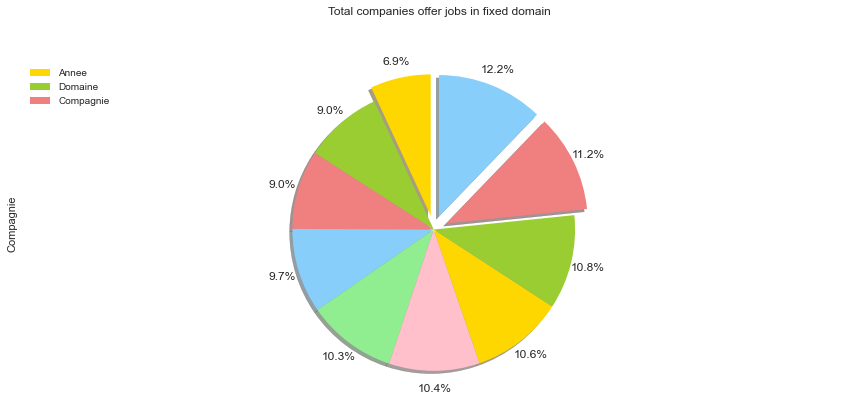

In [80]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0,0,0,0,0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

spec['Compagnie'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Total companies offer jobs in fixed domain', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=spec, loc='upper left') 

plt.show()

In [56]:
# the least
Domaine_group = df.groupby(['Domaine','Annee'])['Compagnie'].count().sort_values().to_frame()
Domaine_group.iloc[220:256,:]

Compagnie
Domaine                            Annee           
Métiers du bâtiment et autres      2011          39
Transport et Logistique            2017          39
Sciences Humaines et Sociales      2020          40
Communication et Journalisme       2016          40
Sciences Informatiques             2011          40
Sciences de l’Education            2017          41
Agriculture – Agroalimentaire      2010          41
Secrétariat                        2010          41
                                   2009          41
Sciences Informatiques             2017          41
Communication et Journalisme       2010          41
Sciences de l’Ingénieur            2009          42
                                   2015          43
Secrétariat                        2013          43
Sciences économiques et politiques 2018          44
Sciences de l’Ingénieur            2018          45
Sciences économiques et politiques 2016          46
Sciences Informatiques             2016          47
Santé et Professions médicales     2020          47
Métiers du bâtiment et autres      2010          48
Sciences Informatiques             2010          49
Non défini                         2011          50
Sciences de l’Ingénieur            2016          51
                                   2017          53
                                   2012          53
                                   2011          54
Sciences économiques et politiques 2014          57
                                   2017          57
Sciences de l’Ingénieur            2014          57
Santé et Professions médicales     2013          61
                                   2009          62
Agriculture – Agroalimentaire      2019          62
Transport et Logistique            2010          64
Agriculture – Agroalimentaire      2015          65
Sciences de l’Ingénieur            2013          65
Santé et Professions médicales     2011          66

In [ ]:
Domaine_annee = df.groupby(['Domaine','Annee']).size().to_frame()
Domaine_annee

In [ ]:
df_first.dtypes

In [ ]:
#df_first['Domaine'] = df_first['Domaine'].astype('category').cat.codes
#df_first['Spécialité'] = df_first['Spécialité'].astype('category').cat.codes
#df_first['Durée'] = df_first['Durée'].astype('category').cat.codes

In [57]:
dummy_var = pd.get_dummies(df_first[['Domaine','Spécialité', 'Durée']], prefix=['Domaine','Spécialité', 'Durée'])
dummy_var

,Domaine_Agriculture – Agroalimentaire,"Domaine_Architecture, Urbanisme et Aménagement du territoire","Domaine_Arts, Culture, Design et mode",Domaine_Biologie/Chimie,Domaine_Communication et Journalisme,Domaine_Consultant/Expert,Domaine_Douane,Domaine_Droit,Domaine_Environnement et Sciences de la Terre,Domaine_Géologie,...,Spécialité_Topographie,Spécialité_Tourisme,Spécialité_Transport,Spécialité_Télécommunication,Spécialité_Ventes,Spécialité_Vétérinaire,Durée_Déterminée,Durée_Déterminée (court terme),Durée_Indéterminée,Durée_Non définie
Date publication,,,,,,,,,,,,,,,,,,,,,
2008-10-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-10-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-10-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-10-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-10-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2011-10-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2011-10-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dummy_var

In [ ]:
dummy_var.columns

In [58]:
df_concat = pd.concat([df_first, dummy_var], axis=1)
df_concat=df_concat.drop(columns=['Date publication','Titre du poste','Domaine','Spécialité','Ville','Durée','Annee']).reset_index()
df_concat = df_concat.drop(columns='Date publication')
df_concat_final = df_concat.groupby('Compagnie').sum()
df_concat_final

,Domaine_Agriculture – Agroalimentaire,"Domaine_Architecture, Urbanisme et Aménagement du territoire","Domaine_Arts, Culture, Design et mode",Domaine_Biologie/Chimie,Domaine_Communication et Journalisme,Domaine_Consultant/Expert,Domaine_Douane,Domaine_Droit,Domaine_Environnement et Sciences de la Terre,Domaine_Géologie,...,Spécialité_Topographie,Spécialité_Tourisme,Spécialité_Transport,Spécialité_Télécommunication,Spécialité_Ventes,Spécialité_Vétérinaire,Durée_Déterminée,Durée_Déterminée (court terme),Durée_Indéterminée,Durée_Non définie
Compagnie,,,,,,,,,,,,,,,,,,,,,
A&V Multiservices,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ACC Construction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ACDI-VOCA HQ,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
ACDI/VOCA,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,23.0,0.0
ACOSME NORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
i7lab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
institution mixte virginie sampeur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
international,9.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,14.0,25.0,0.0


In [59]:
# Enterprise who offer an undetermined contract (for career eventually)
indeterminee_part = df_concat_final['Durée_Indéterminée'].to_frame()
indeterminee_part

,Durée_Indéterminée
Compagnie,
A&V Multiservices,1.0
ACC Construction,1.0
ACDI-VOCA HQ,5.0
ACDI/VOCA,23.0
ACOSME NORD,0.0
...,...
i7lab,1.0
institution mixte virginie sampeur,1.0
international,25.0


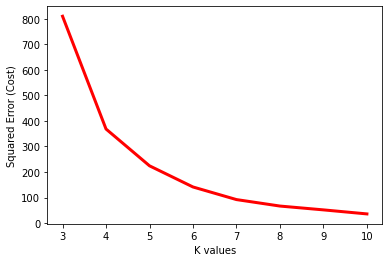

In [60]:
from sklearn.cluster import KMeans

#df_concat_clustering = df_concat_final


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(indeterminee_part)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [61]:
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

C:\Users\DG IDERICE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


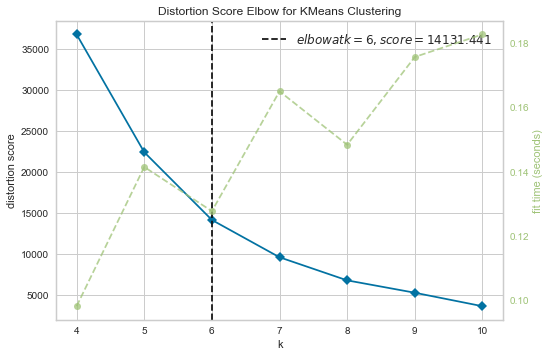

In [62]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,11))

visualizer.fit(indeterminee_part)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [63]:
kclusters = 6


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(indeterminee_part)

kmeans.labels_

array([4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 3, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4,
       0, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 5, 0, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 3, 4, 0, 3, 0, 3, 3, 4, 0, 4, 0, 0, 4, 0, 0, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 3, 4,
       4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 4, 4, 4, 4, 3, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 4,

In [64]:
data_clust = indeterminee_part.insert(0, 'Cluster Labels', kmeans.labels_)
#toronto_merged = toronto_DF
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_first = pd.concat([df_first,data_clust])#, on='Durée')

data_clust

In [65]:
indeterminee_part

,Cluster Labels,Durée_Indéterminée
Compagnie,,
A&V Multiservices,4,1.0
ACC Construction,4,1.0
ACDI-VOCA HQ,4,5.0
ACDI/VOCA,0,23.0
ACOSME NORD,4,0.0
...,...,...
i7lab,4,1.0
institution mixte virginie sampeur,4,1.0
international,0,25.0


In [99]:
#Cluster 0
clust_0 = indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 0]
clust_0

,Cluster Labels,Durée_Indéterminée
Compagnie,,
ACDI/VOCA,0,23.0
AECOM,0,11.0
Abt Associates,0,9.0
Action Aid,0,18.0
Action Contre la Faim - Haïti,0,24.0
...,...,...
US Agency for International Development,0,24.0
USAID/LOKAL+,0,21.0
Unité Technique d'Exécution du Ministère de l'Economie et des Finances,0,12.0


In [95]:
# cluster 1
indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 1]

,Cluster Labels,Durée_Indéterminée
Compagnie,,
Save the Children en Haiti,1,179.0
Secteur privé,1,228.0


In [68]:
# cluster 2
indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 2]

,Cluster Labels,Durée_Indéterminée
Compagnie,,
Autres ONG's,2,130.0
CARE Haiti,2,131.0
Croix Rouge Americaine,2,83.0
Habitat for Humanity International,2,84.0
Management Sciences for Health,2,84.0
Organisation Haïtienne de Maketing Social pour la Santé (PSI-Haïti),2,125.0
Unigestion Holding S.A./Digicel,2,150.0
World Vision Haiti,2,96.0
Zanmi Lasante/PIH,2,105.0


In [69]:
# cluster 3
indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 3]

,Cluster Labels,Durée_Indéterminée
Compagnie,,
Abt Associates Haiti / Shops Plus Project USAID,3,40.0
American Refugee Committee,3,29.0
Build Change,3,32.0
Centre de Formation et d'Encadrement Technique S.A.,3,42.0
Chemonics / GHSC-PSM,3,55.0
Chemonics / IFMS,3,57.0
Chemonics International / Projet de reboisement USAID,3,47.0
Chemonics International / Projustice,3,41.0
Cimenterie Nationale S.A.,3,48.0


In [70]:
# cluster 4
indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 4]

,Cluster Labels,Durée_Indéterminée
Compagnie,,
A&V Multiservices,4,1.0
ACC Construction,4,1.0
ACDI-VOCA HQ,4,5.0
ACOSME NORD,4,0.0
AFS,4,1.0
...,...,...
Worldreader,4,0.0
Yunus Social Business Haiti S.A.,4,1.0
i7lab,4,1.0


In [71]:
# cluster 5
indeterminee_part.loc[indeterminee_part['Cluster Labels'] == 5]

,Cluster Labels,Durée_Indéterminée
Compagnie,,
Catholic Relief Services,5,407.0
